In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from keras_preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
# Load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/abc/Text-dataset.csv',delimiter=',',encoding='latin-1')
df.head()

,Height,Class
0,This is a beautiful picture,1
1,Why you are sad today,0
2,I passed my exams,1
3,He fails his exams,0
4,There is a rainy day,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Male and Female Category')

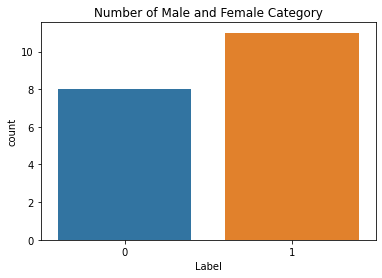

In [ ]:
sns.countplot(df.Class)
plt.xlabel('Label')
plt.title('Number of Male and Female Category')

In [ ]:
X = df.Height
Y = df.Class
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33)

In [ ]:
max_words = 1000
max_len = 500
t = Tokenizer(num_words=max_words)
t.fit_on_texts(X_train)
sequences = t.texts_to_sequences(X_train)
#sequences[:10]

In [ ]:
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
#sequences_matrix[:5]

In [ ]:
i = tf.keras.layers.Input(shape=[max_len])
x = tf.keras.layers.Embedding(max_words, 50, input_length=max_len)(i)
x = tf.keras.layers.LSTM(256, return_sequences=True )(x)
x = tf.keras.layers.GRU(512, return_sequences=True )(x)
x = tf.keras.layers.GRU(256, return_sequences=False)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1, activation='relu')(x)

model = tf.keras.models.Model(inputs=i, outputs=x)

model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
#model.summary()

In [ ]:
r = model.fit(sequences_matrix , Y_train,
              batch_size=128, epochs=10,
              validation_split=0.2,
              callbacks=[tf.keras.callbacks.EarlyStopping(
                  monitor='val_loss', min_delta=0.0001)])

Epoch 1/10
1/1 [==============================] - 12s 12s/step - loss: 4.0047 - accuracy: 0.3333 - val_loss: 0.6409 - val_accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 5s 5s/step - loss: 1.0602 - accuracy: 0.3333 - val_loss: 10.1662 - val_accuracy: 0.3333


In [ ]:
max_words = 1000
max_len = 500
t = Tokenizer(num_words=max_words)
t.fit_on_texts(X_test)
sequences = t.texts_to_sequences(X_test)
sequences[:10]

[[2, 1, 3, 4, 5],
 [9, 10, 11, 12, 13],
 [2, 1, 3, 4, 5],
 [14, 15, 6, 16],
 [6, 7, 1, 8],
 [6, 7, 1, 8],
 [2, 1, 3, 4, 5]]

In [ ]:
sequences_matrix = sequence.pad_sequences(sequences, maxlen=max_len)
X_test=sequences_matrix[:100]# number of rows

In [ ]:
s = model.evaluate(X_test, Y_test)
     

1/1 [==============================] - 1s 563ms/step - loss: 2.1785 - accuracy: 0.8571


In [ ]:
print("Accuracy=")
print(s[1])

print("Loss=")
print(s[0])

Accuracy=


NameError: ignored